In [1]:
# lets import the key libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#lets import the data

df = pd.read_csv('C:/Users/GS/OneDrive/Desktop/Python/Project ( Linear and Logistic Regression)/Sparky Foundation/student.csv')

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# let discover the statistical measure of this dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<Axes: xlabel='Hours', ylabel='Count'>

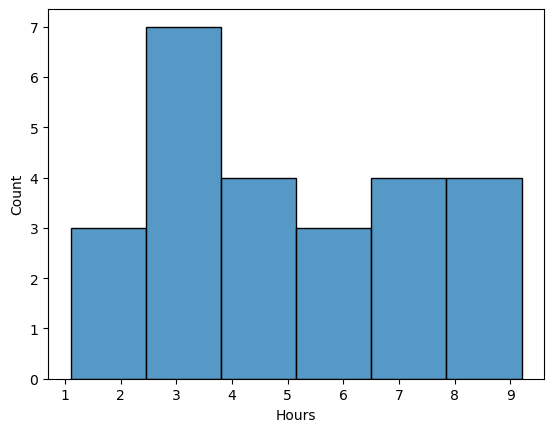

In [5]:
# lets check the distribution

sns.histplot(x='Hours', data = df)

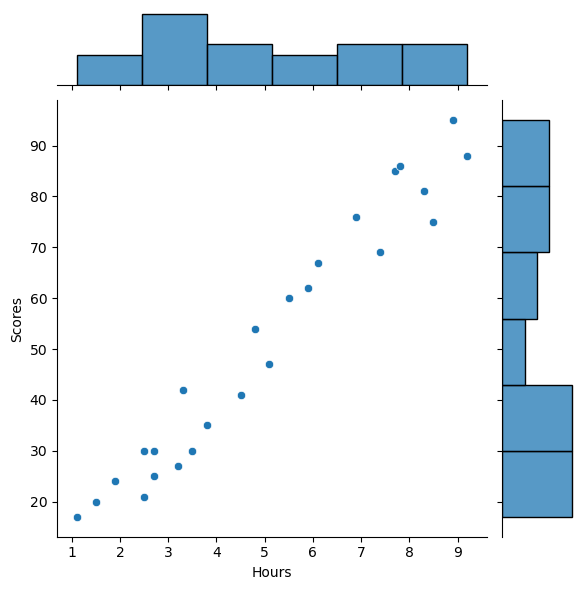

In [6]:
# lets check the relation of both variables

sns.jointplot(x = 'Hours', y = 'Scores',data = df)

In [7]:
## This depicts the postive linear relation and there are no outliers.

In [8]:
# lets check the correlation among them.

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
# let's create a model with this aim our independent variable will be Hours, and the dependent variable will be Scores.
import statsmodels.api as sn

In [10]:
# as we know by default the statsmodel does not contain an intercept value so we first define here.

x_const = sn.add_constant(df['Hours'])

In [11]:
y_val = df['Scores']

In [12]:
lm = sn.OLS(y_val,x_const).fit()

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           9.13e-17
Time:                        14:03:22   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
## So, the R squared value is near to 1 which means model fits the data really well.

In [15]:
x_val = df[['Hours']] 

#  here we need to make sure that the x variable should be a 2D array which can be done by using double brackets.

In [16]:
y_val

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [17]:
# let train the model to answer the different result. We will use sklearn library to do this tasks.

from sklearn.model_selection import train_test_split


In [18]:
x_train,x_test,y_train,y_test = train_test_split(x_val,y_val, test_size = 0.2, random_state = 0)

In [19]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20,) (5,)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(x_train,y_train)

LinearRegression()

In [23]:
y_test_pre = lm.predict(x_test)

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_test,y_test_pre)

0.9454906892105356

In [26]:
a = lm.predict([[9.25]])

C:\Users\GS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
a[0]

93.69173248737538

In [ ]:
## It means that when a student studies 9.25 hours, he will get a 93.69 score. Which is 94.5% correct as our r2 value tells us.